# III. CÂU HỎI


## Nội dung

**Trong cuộc khủng hoảng tài chính năm 2008, các công ty thuộc các lĩnh vực khác nhau có suy giảm trong giá trị vốn hóa thị trường không? Nếu có, những lĩnh vực nào bị ảnh hưởng nặng nề nhất?**  

[Khủng hoảng tài chính 2008](https://vi.wikipedia.org/wiki/Kh%E1%BB%A7ng_ho%E1%BA%A3ng_t%C3%A0i_ch%C3%ADnh_2007%E2%80%9308) bắt nguồn từ bong bóng nhà ở ở Mỹ dẫn đến sự đổ vỡ của hệ thống ngân hàng sau đó khủng hoảng lan ra toàn thế giới.  
## Mục đích  
- Biết được tác động của khủng hoảng kinh tế để có kế hoạch thích ứng với các đợt khủng hoảng sẽ diễn ra trong tương lai. Đặc biệt thời kỳ hậu Covid.
- Giúp người đầu tư có thể đưa ra chiến lược đầu tư thông minh hơn khi gặp các cuộc khủng hoảng.
- Giúp doanh nghiệp có hiểu biết về rủi ro và chuẩn bị cho việc quản lý rủi ro.

___

## Tiền xử lý


### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset đã được xử lý

In [2]:
df = pd.read_csv("../Data/preprocessed/cleaned_dataset.csv")
df.head()

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories
0,Apple,2023,6.16,114.30,383.28,3043.0,111.08,62.14,352.58,61.55,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
1,Apple,2022,5.92,113.96,387.53,2066.0,120.06,50.67,352.75,48.30,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
2,Apple,2021,6.08,116.90,378.32,2901.0,124.71,63.09,351.00,62.63,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
3,Apple,2020,3.74,74.25,294.13,2255.0,112.43,65.33,323.88,90.94,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
4,Apple,2019,3.19,66.15,267.68,1287.0,108.04,90.48,338.51,100.55,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."


Ta sẽ xem xét xu hướng `Marketcap ($B)` từ năm `2004` đến năm `2011`. 3 năm trước và 3 năm sau khủng hoảng 2007-2008.  
Ta lọc ra dữ liệu từ năm `2004` đến năm `2011`. Ở câu hỏi này ta chỉ quan tâm đến `Marketcap ($B)` nên ta sẽ giữ lại 1 số cột.

In [3]:
mask_year = df["Year"].between(2004,2011)
filtered_data = df[mask_year][["Company","Year","Marketcap ($B)","Country","Categories"]]
filtered_data.head()

,Company,Year,Marketcap ($B),Country,Categories
12,Apple,2011,377.51,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
13,Apple,2010,297.09,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
14,Apple,2009,190.98,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
15,Apple,2008,75.99,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
16,Apple,2007,174.03,USA,"Software, Tech, Electronics, Dow jones, Tech H..."


Trước ta xem xét các công ty về bất động sản và tài chính ở Mỹ.

**Các công ty bất động sản ở Mỹ**

In [4]:
mask_real_estate = filtered_data["Categories"].str.contains("real estate",case=False)
mask_usa = filtered_data["Country"] == "USA"
data_real_estate = filtered_data[mask_real_estate & mask_usa]
data_real_estate.head()

,Company,Year,Marketcap ($B),Country,Categories
2703,Prologis,2011,13.10,USA,"Real estate, Investment, REITs"
2704,Prologis,2010,5.35,USA,"Real estate, Investment, REITs"
2705,Prologis,2009,3.81,USA,"Real estate, Investment, REITs"
2706,Prologis,2008,2.30,USA,"Real estate, Investment, REITs"
2707,Prologis,2007,5.71,USA,"Real estate, Investment, REITs"


Ta lấy ra 10 công ty có trung bình `Marketcap ($B)` qua các năm lớn nhất để phân tích.

In [5]:
# Name of 10 real estate companies
real_estate_names = list(data_real_estate[["Company","Marketcap ($B)"]]
          .groupby("Company")
          .mean()
          .sort_values(by="Marketcap ($B)",ascending=False)
          .head(10).index
)
real_estate_names

['Simon Property Group',
 'Rocket Companies',
 'Invitation Homes',
 'American Tower',
 'Public Storage',
 'VICI Properties',
 'Equity Residential',
 'Boston Properties',
 'Crown Castle',
 'Healthpeak Properties']

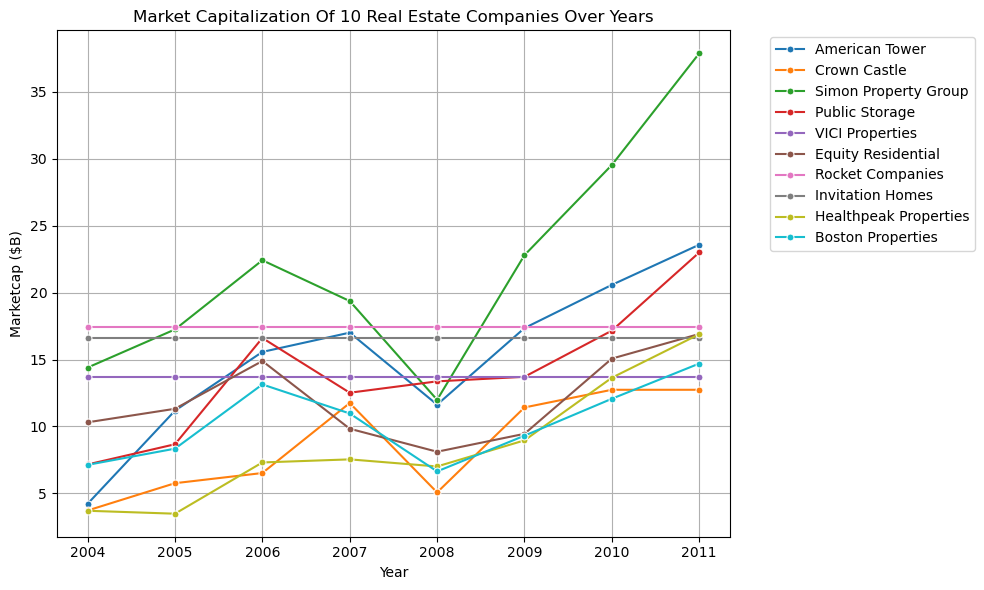

In [6]:
# Create dataframe of 10 biggest real estate companies
df_re = data_real_estate[data_real_estate["Company"].isin(real_estate_names)]

plt.figure(figsize=(10, 6))
# Make line plot
plot = sns.lineplot(data=df_re, x='Year', y='Marketcap ($B)', hue='Company', marker='o', markersize=5)

plt.title('Market Capitalization Of 10 Real Estate Companies Over Years')
plt.xlabel('Year')
plt.ylabel('Marketcap ($B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()


Nhận xét:  
- Ta thấy các công ty bất động sản đều bắt đầu suy giảm từ năm 2007 và 2008.
- Các công ty như Rocket Companies, VICI Properties và Invitation Home đều không giảm và là hằng số do bước khám phá dữ liệu ta đã điền dữ liệu vào các cột bị mất dữ liệu.
- Sau năm 2008 các công ty có sự phục hồi.

**Các công ty tài chính ở Mỹ**

In [7]:
mask_finance = filtered_data["Categories"].str.contains("financial|banks",case=False)
data_finance = filtered_data[mask_finance & mask_usa]
data_finance.head()

,Company,Year,Marketcap ($B),Country,Categories
242,Visa,2011,67.760,USA,"Financial services, Dow jones"
243,Visa,2010,48.370,USA,"Financial services, Dow jones"
244,Visa,2009,60.900,USA,"Financial services, Dow jones"
245,Visa,2008,44.370,USA,"Financial services, Dow jones"
246,Visa,2007,186.445,USA,"Financial services, Dow jones"


Ta lấy ra 10 công ty có trung bình `Marketcap ($B)` qua các năm lớn nhất để phân tích.

In [8]:
# Name of 10 finance companies
finance_names = list(data_finance[["Company","Marketcap ($B)"]]
          .groupby("Company")
          .mean()
          .sort_values(by="Marketcap ($B)",ascending=False)
          .head(10).index
)
finance_names

['Citigroup',
 'Bank of America',
 'JPMorgan Chase',
 'Wells Fargo',
 'Visa',
 'PayPal',
 'Goldman Sachs',
 'American Express',
 'U.S. Bancorp',
 'Mastercard']

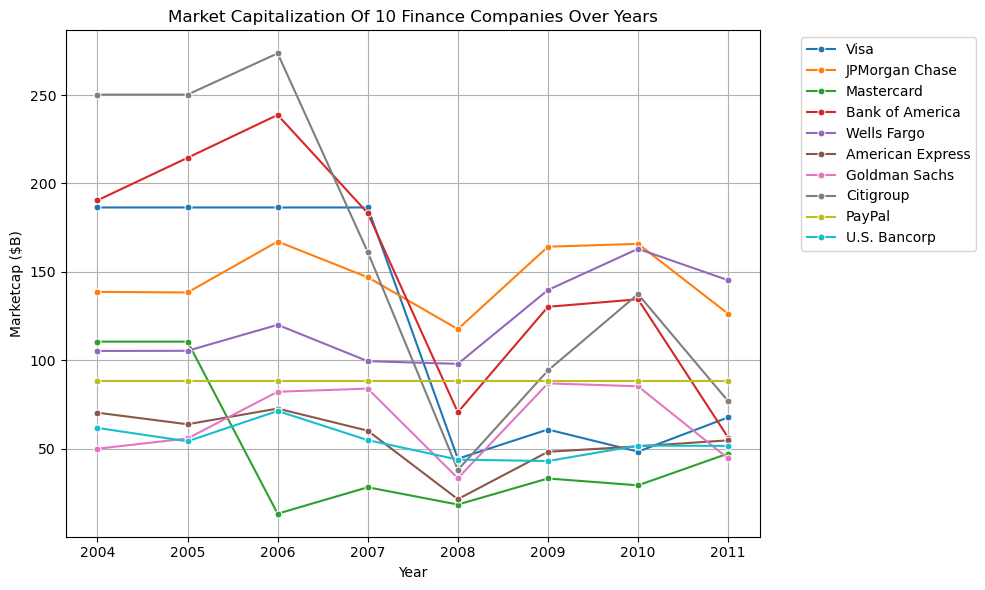

In [9]:
# Create dataframe of 10 biggest finance companies
df_fi = data_finance[data_finance["Company"].isin(finance_names)]

plt.figure(figsize=(10, 6))

plot = sns.lineplot(data=df_fi, x='Year', y='Marketcap ($B)', hue='Company', marker='o', markersize=5)

plt.title('Market Capitalization Of 10 Finance Companies Over Years')
plt.xlabel('Year')
plt.ylabel('Marketcap ($B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:  
- Giống như các công ty bất động sản, các công ty thuộc lĩnh vực bất động sản cũng có sự suy giảm giá trị vốn hóa.
- So với các công ty bất động sản, các công ty tài chính có sự suy giảm mạnh, đồ thị có độ dốc khá lớn.
- Trong đó công ty PayPal có đồ thị hằng do bước khám phá dữ liệu đã điền dữ liệu thiếu.
- Sau năm 2008 các công ty cũng có sự phục hồi.

Tiếp theo ta xem xét thêm các lĩnh vực khác trên toàn thế giới.

In [10]:
filtered_data["Categories"].str.split(", ").explode().value_counts().to_dict()

{'Financial services': 2152,
 'Tech': 1864,
 'Energy': 1472,
 'Banks': 1392,
 'Manufacturing': 968,
 'OilGas': 784,
 'Software': 712,
 'Investment': 712,
 'Insurance': 704,
 'Electricity': 688,
 'Biotech': 664,
 'Pharmaceuticals': 648,
 'Real estate': 632,
 'Retail': 584,
 'Internet': 552,
 'Electronics': 544,
 'Food': 528,
 'Tech Hardware': 504,
 'Telecommunication': 440,
 'Transportation': 440,
 'Utility companies': 424,
 'Semiconductors': 384,
 'Chemicals': 384,
 'Professional services': 352,
 'Mining': 336,
 'Travel': 312,
 'DAX': 312,
 'Beverages': 304,
 'CAC 40': 304,
 'Automakers': 296,
 'Entertainment': 280,
 'Infrastructure': 264,
 'Conglomerate': 256,
 'REITs': 248,
 'Dow jones': 240,
 'Healthcare': 232,
 'Medical devices': 208,
 'Consumer goods': 192,
 'Construction': 184,
 'Engineering': 184,
 'Clothing': 184,
 'Alcoholic beverages': 176,
 'Supermarket Chains': 168,
 'ECommerce': 168,
 'Steel industry': 160,
 'Aerospace': 152,
 'Defense contractors': 152,
 'Steel producers'

Ta sẽ lấy thêm các công ty của 3 lĩnh vực khác (có nhiều công ty thuộc lĩnh vực đó nhất) ngoài `Real estate` và `Finance` để phân tích. Ta sẽ phân tích `Tech`,`Energy` và `Manufacturing`.

**Các công ty công nghệ trên toàn thế giới**

In [11]:
mask_tech = filtered_data["Categories"].str.contains("tech ",case=False)
data_tech = filtered_data[mask_tech]
data_tech.head()

,Company,Year,Marketcap ($B),Country,Categories
12,Apple,2011,377.51,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
13,Apple,2010,297.09,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
14,Apple,2009,190.98,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
15,Apple,2008,75.99,USA,"Software, Tech, Electronics, Dow jones, Tech H..."
16,Apple,2007,174.03,USA,"Software, Tech, Electronics, Dow jones, Tech H..."


In [12]:
# Name of 10 technology companies
tech_names = list(data_tech[["Company","Marketcap ($B)"]]
          .groupby("Company")
          .mean()
          .sort_values(by="Marketcap ($B)",ascending=False)
          .head(10).index
)
tech_names

['Apple',
 'Samsung',
 'Cisco',
 'Intel',
 'HP',
 'QUALCOMM',
 'Arm Holdings',
 'TSMC',
 'Xiaomi',
 'Dell']

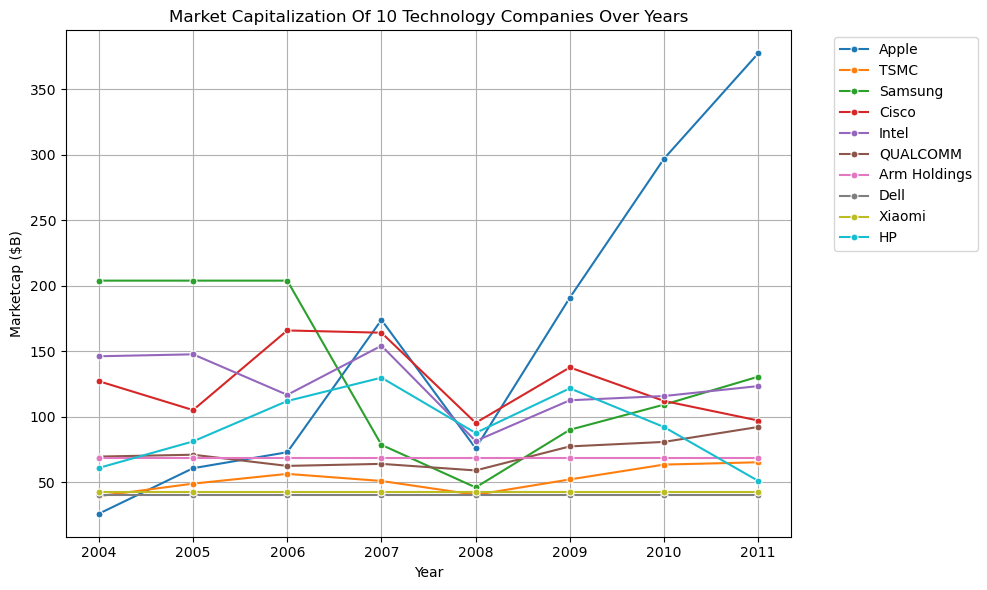

In [13]:
# Create dataframe of 10 biggest technology companies
df_tech = data_tech[data_tech["Company"].isin(tech_names)]

plt.figure(figsize=(10, 6))

plot = sns.lineplot(data=df_tech, x='Year', y='Marketcap ($B)', hue='Company', marker='o', markersize=5)

plt.title('Market Capitalization Of 10 Technology Companies Over Years')
plt.xlabel('Year')
plt.ylabel('Marketcap ($B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:  
- Các công ty công nghệ cũng có sự suy giảm vào năm 2008.
- Sau đó có phục hồi nhưng tiếp tục bị suy giảm.

**Các công ty năng lượng trên toàn thế giới**

In [14]:
mask_energy = filtered_data["Categories"].str.contains("energy",case=False)
data_energy = filtered_data[mask_energy]
data_energy.head()

,Company,Year,Marketcap ($B),Country,Categories
58,Saudi Aramco,2011,1908.0,Saudi Arabia,"OilGas, Energy"
59,Saudi Aramco,2010,1908.0,Saudi Arabia,"OilGas, Energy"
60,Saudi Aramco,2009,1908.0,Saudi Arabia,"OilGas, Energy"
61,Saudi Aramco,2008,1908.0,Saudi Arabia,"OilGas, Energy"
62,Saudi Aramco,2007,1908.0,Saudi Arabia,"OilGas, Energy"


In [15]:
# Name of 10 energy companies
energy_names = list(data_energy[["Company","Marketcap ($B)"]]
          .groupby("Company")
          .mean()
          .sort_values(by="Marketcap ($B)",ascending=False)
          .head(10).index
)
energy_names

['Saudi Aramco',
 'Exxon Mobil',
 'PetroChina',
 'BP',
 'Chevron',
 'Petrobras',
 'TotalEnergies',
 'Shell',
 'ENI',
 'ConocoPhillips']

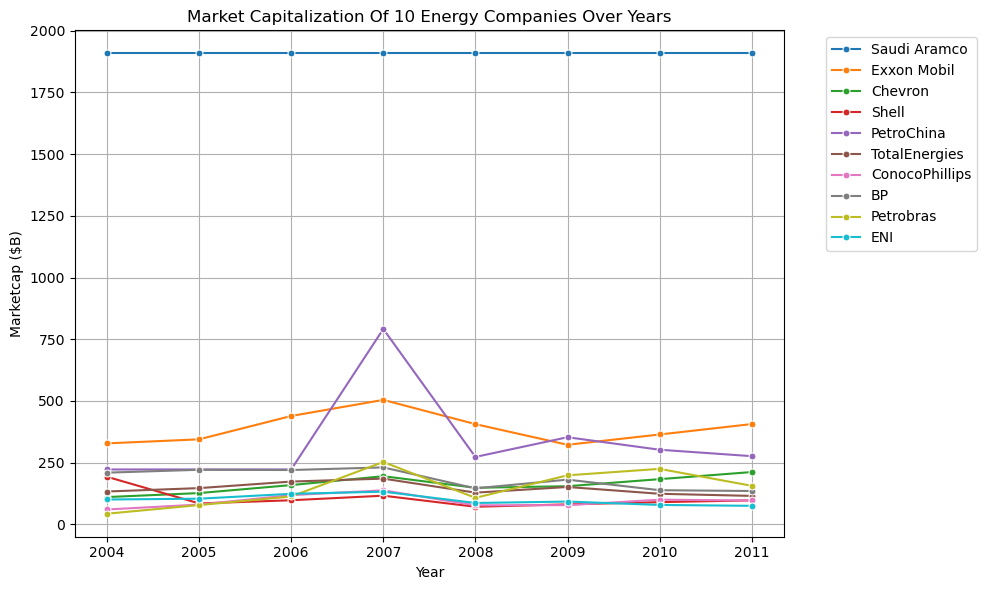

In [16]:
# Create dataframe of 10 biggest energy companies
df_energy = data_energy[data_energy["Company"].isin(energy_names)]

plt.figure(figsize=(10, 6))

plot = sns.lineplot(data=df_energy, x='Year', y='Marketcap ($B)', hue='Company', marker='o', markersize=5)

plt.title('Market Capitalization Of 10 Energy Companies Over Years')
plt.xlabel('Year')
plt.ylabel('Marketcap ($B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:
- Các công ty đều bị suy giảm trong năm 2008.
- Sau đó trong vòng 3 năm các công ty dần phục hồi nhưng vẫn trở về được như lúc trước khủng hoảng.

**Các công ty chế tạo trên toàn thế giới**

In [17]:
mask_manu = filtered_data["Categories"].str.contains("Manufacturing",case=False)
data_manu = filtered_data[mask_manu]
data_manu.head()

,Company,Year,Marketcap ($B),Country,Categories
196,Tesla,2011,2.97,USA,"Automakers, Tech, Electric Vehicles, Bitcoin, ..."
197,Tesla,2010,2.52,USA,"Automakers, Tech, Electric Vehicles, Bitcoin, ..."
198,Tesla,2009,43.37,USA,"Automakers, Tech, Electric Vehicles, Bitcoin, ..."
199,Tesla,2008,43.37,USA,"Automakers, Tech, Electric Vehicles, Bitcoin, ..."
200,Tesla,2007,43.37,USA,"Automakers, Tech, Electric Vehicles, Bitcoin, ..."


In [18]:
# Name of 10 manufacturing companies
manu_names = list(data_manu[["Company","Marketcap ($B)"]]
          .groupby("Company")
          .mean()
          .sort_values(by="Marketcap ($B)",ascending=False)
          .head(10).index
)
manu_names

['Toyota',
 'Samsung',
 'Intel',
 'Porsche',
 'Mercedes-Benz',
 'Honda',
 'Mindray',
 'TSMC',
 'Boeing',
 'General Motors']

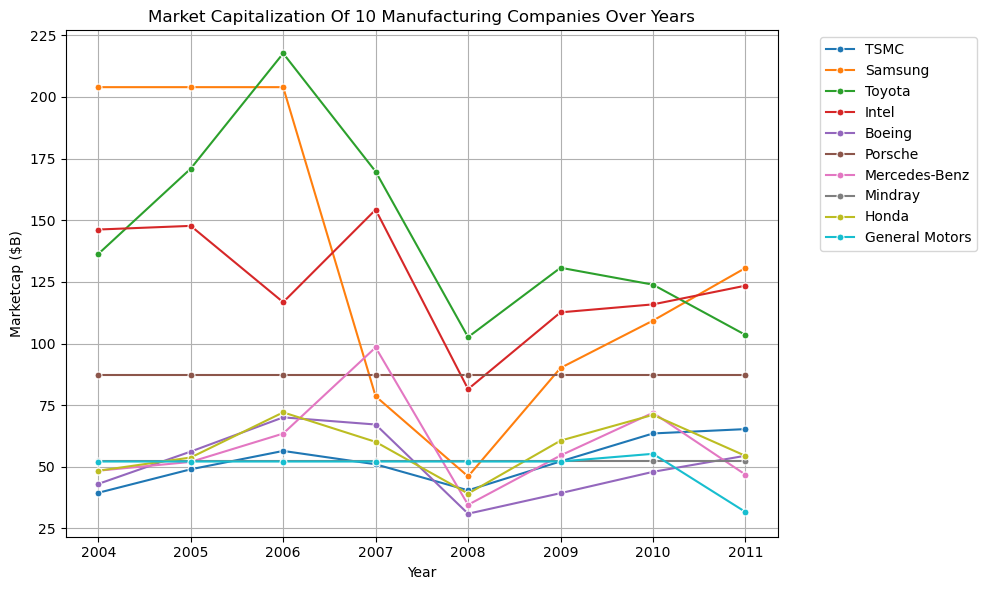

In [19]:
# Create dataframe of 10 biggest manufacturing companies
df_manu = data_manu[data_manu["Company"].isin(manu_names)]

plt.figure(figsize=(10, 6))

plot = sns.lineplot(data=df_manu, x='Year', y='Marketcap ($B)', hue='Company', marker='o', markersize=5)

plt.title('Market Capitalization Of 10 Manufacturing Companies Over Years')
plt.xlabel('Year')
plt.ylabel('Marketcap ($B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:  
- Các công ty thuộc lĩnh vực chế tạo cũng bị ảnh hưởng bởi khủng hoảng, đều bị suy giảm vào năm 2008.
- Sau đó các công ty cũng có phục hồi, nhưng lại tiếp tục suy giảm vào năm 2011.

**Ta sẽ tính xem lĩnh vực nào suy giảm nhiều nhất**

Ta chỉ xem xét trong 5 lĩnh vực: `Real estate`,`Finance`,`Energy`,`Technology` và `Manufacturing`.

Tạo DataFrame chứa dữ liệu của tất cả các công ty vào năm 2007 và 2008

In [20]:
data_2007 = filtered_data[filtered_data["Year"] == 2007]
data_2008 = filtered_data[filtered_data["Year"] == 2008]

data_2007 = data_2007[['Company', 'Marketcap ($B)', 'Categories', 'Country']].set_index('Company')
data_2008 = data_2008[['Company', 'Marketcap ($B)']].set_index('Company')

# Rename columns for differentiation between years
data_2007 = data_2007.rename(columns={'Marketcap ($B)': 'Marketcap 2007 ($B)'})
data_2008 = data_2008.rename(columns={'Marketcap ($B)': 'Marketcap 2008 ($B)'})

# Merge the 2007 and 2008 data
merged_data = pd.merge(data_2007, data_2008, left_index=True, right_index=True, how='inner')

merged_data.head()


,Marketcap 2007 ($B),Categories,Country,Marketcap 2008 ($B)
Company,,,,
Apple,174.03,"Software, Tech, Electronics, Dow jones, Tech H...",USA,75.99
Microsoft,332.11,"Software, Tech, Video games, Dow jones, AI",USA,172.92
Saudi Aramco,1908.00,"OilGas, Energy",Saudi Arabia,1908.00
Alphabet (Google),825.29,"Software, Internet, Tech, Autonomous driving, AI",USA,825.29
Amazon,38.53,"ECommerce, Retail, Internet, Tech",USA,21.99


Ta sẽ tính ra phần trăm giảm của giá trị vốn hóa.

In [21]:
merged_data["Marketcap Change (%)"] = (
    (
        ((merged_data["Marketcap 2008 ($B)"] - merged_data["Marketcap 2007 ($B)"]) / merged_data["Marketcap 2007 ($B)"]) * 100
    ).round(2)
)
merged_data.head()

,Marketcap 2007 ($B),Categories,Country,Marketcap 2008 ($B),Marketcap Change (%)
Company,,,,,
Apple,174.03,"Software, Tech, Electronics, Dow jones, Tech H...",USA,75.99,-56.34
Microsoft,332.11,"Software, Tech, Video games, Dow jones, AI",USA,172.92,-47.93
Saudi Aramco,1908.00,"OilGas, Energy",Saudi Arabia,1908.00,0.00
Alphabet (Google),825.29,"Software, Internet, Tech, Autonomous driving, AI",USA,825.29,0.00
Amazon,38.53,"ECommerce, Retail, Internet, Tech",USA,21.99,-42.93


Tạo ra DataFrame chứa tổng phần trăm suy giảm của 5 lĩnh vực `Real estate`,`Finance`,`Energy`,`Technology` và `Manufacturing`.

In [22]:
data_change_re = merged_data[merged_data["Categories"].str.contains("real estate",case=False)]
data_change_finance = merged_data[merged_data["Categories"].str.contains("financial|banks",case=False)]
data_change_tech = merged_data[merged_data["Categories"].str.contains("tech ",case=False)]
data_change_energy = merged_data[merged_data["Categories"].str.contains("energy",case=False)]
data_change_manu = merged_data[merged_data["Categories"].str.contains("Manufacturing",case=False)]


In [23]:
sum_changes_df = pd.DataFrame({
    'Real Estate': [data_change_re['Marketcap Change (%)'].sum()],
    'Finance': [data_change_finance['Marketcap Change (%)'].sum()],
    'Tech': [data_change_tech['Marketcap Change (%)'].sum()],
    'Energy': [data_change_energy['Marketcap Change (%)'].sum()],
    'Manufacturing': [data_change_manu['Marketcap Change (%)'].sum()]
})

sum_changes_df


,Real Estate,Finance,Tech,Energy,Manufacturing
0,-953.32,-9324.78,-2449.0,-4600.05,-3605.28


Trực quan hóa:

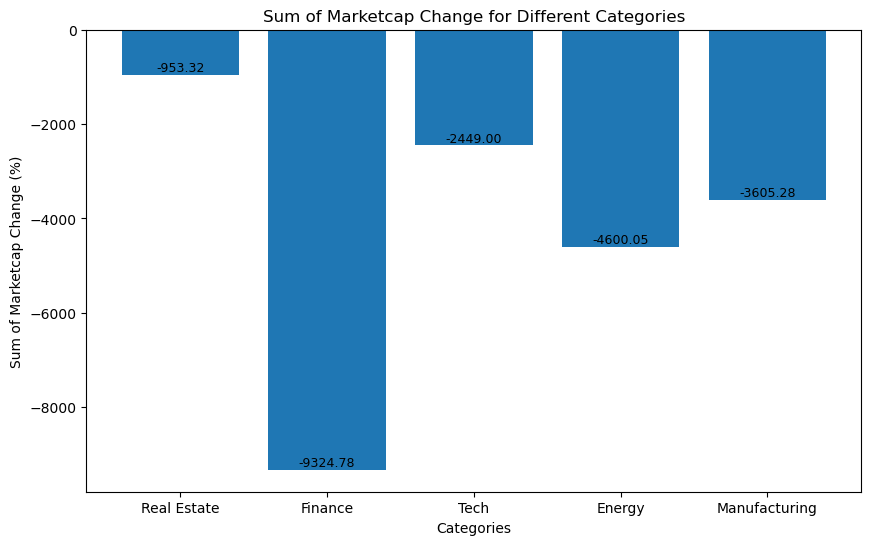

In [24]:
categories = sum_changes_df.columns
values = sum_changes_df.values.flatten()

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{val:.2f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('Categories')
plt.ylabel('Sum of Marketcap Change (%)')
plt.title('Sum of Marketcap Change for Different Categories')

plt.show()

Nhận xét:
- Tài chính là lĩnh vực có sự suy giảm nhiều nhất.
- Sau đó là Năng lượng, Chế tạo và Công nghệ.

Kết luận:  
- Trong cuộc khủng hoảng 2008, các công ty trong các lĩnh vực khác nhau đều có sự suy giảm vốn hóa thị trường.
- Trong đó lĩnh vực tài chính bị suy giảm nhiều nhất do chịu tác động trực tiếp từ bong bóng nhà đất ở Mỹ.
- Cuộc khủng hoảng tài chính ở Mỹ gây ra sự khủng hoảng của các lĩnh vực khác trên toàn thế giới.